<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/Subhajit_M1_MP1_NB_Resume_Classification_Using_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Resume Classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Resume dataset
* perform multinomial Naive Bayes classification on the Resume dataset

### Dataset description

The data is in CSV format, with two features: Category, and Resume. 

**Category** -  Industry sector to which the resume belongs to, and 

**Resume** - The complete CV (text) of the candidate.

##  Grading = 10 Points

## Information

Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates. Finding suitable candidates for an open role from a database of 1000s of resumes can be a tough task. Automated resume categorization can speeden the candidate selection process. Such automation can really ease the tedious process of fair screening and shortlisting the right candidates and aid quick decisionmaking.

To learn more about this, click [here](https://www.sciencedirect.com/science/article/pii/S187705092030750X).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Downloading the data

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/UpdatedResumeDataSet.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


**Exercise 1: Read the UpdatedResumeDataset.csv dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')
print (df.shape)
df.head(10)      # first 10 rows 

(962, 2)


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
# Creating a new column cleaned_resume
df['cleaned_resume'] = ''
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
# Extracting the information regarding the non-null counts of each of the features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


### Pre-processing and EDA

**Exercise 2: Display  all the categories of resumes and their counts in the dataset [0.5 Mark]**



In [ ]:
# Display the distinct categories of resume
# YOUR CODE 
print("-----Resume Categories-----")
print("Displaying the distinct categories of resume:\n ")
print(df['Category'].unique())

-----Resume Categories-----
Displaying the distinct categories of resume:
 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category
# YOUR CODE HERE
print("-----Count of each Resume Category-----")
print("Displaying the distinct categories of resume and the no. of records belonging to each category:\n")
print(df['Category'].value_counts())
# to append option using groupby

-----Count of each Resume Category-----
Displaying the distinct categories of resume and the no. of records belonging to each category:

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


**Exercise 3: Create the count plot of different categories [0.5 Mark]**

**Hint:** Use `sns.countplot()`

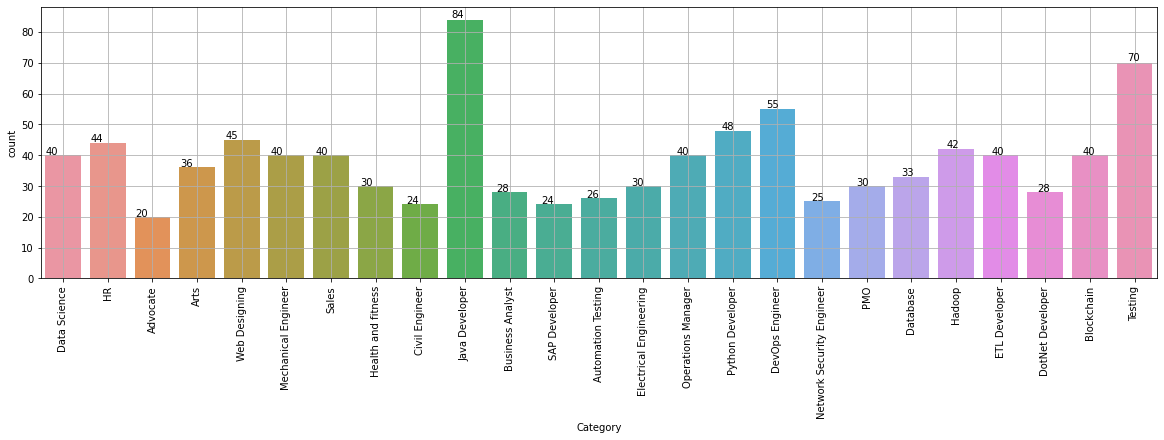

In [ ]:
# YOUR CODE HERE
# Option-1: count plot of different categories
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

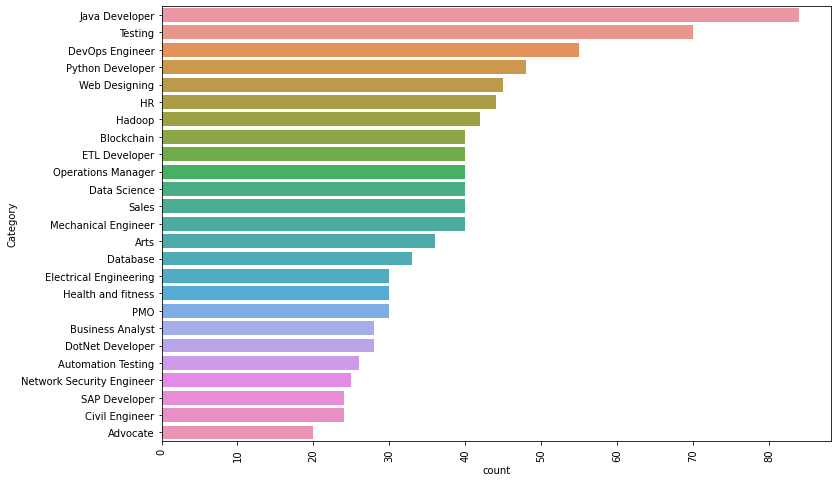

In [ ]:
# Option-2: count plot of different categories
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df,order=df['Category'].value_counts().index)
plt.show()

**Exercise 4: Create a pie plot depicting the percentage of resume distributions category-wise [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

Grid:  GridSpec(2, 2)
Target Counts:
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64
Total no. of unique categories =  25
25  no. of Quantized distinct color levels:  [(0.2298057, 0.298717966, 0.753683153, 1.0), (0.2758

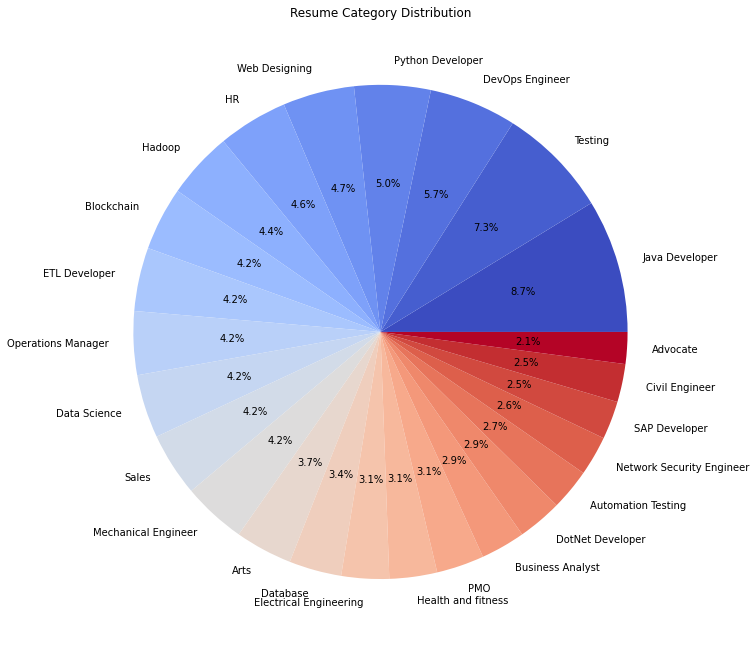

In [ ]:
# Option-1: pie plot depicting the percentage of resume distributions category-wise
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
squaregrid_layout = GridSpec(2, 2)
print("Grid: ",squaregrid_layout)
# YOUR CODE HERE to display pie chart with color coding (eg. `coolwarm`)
# Creating the colormap
colormap = plt.get_cmap('coolwarm')
print(colormap)

print("Target Counts:")
print(targetCounts)
print("Total no. of unique categories = ",len(targetCounts))
# Out of the total colormap of 1800x1800 pixels,
# The objective is to allocate total 25 no. of pixels each with an unique color intensity
# Step-1: Creating evenly spaced 25 quantized values over a specified interval of 0 to 1 
# Step-2: enumerating each of the 25 quantized values by utilizing a for loop
# Step-3: Mapping each of the enumerated values, to the created colormap
# Step-4: Extracting the corresponding pixel intensity or color from the 1800x1800 colormap
colors = [colormap(i) for i in np.linspace(0, 1, len(targetCounts))]
print(len(targetCounts)," no. of Quantized distinct color levels: ",colors)
# Result: Able to affix a distinct pixel color to each of the 25 resume categories
plt.subplot(squaregrid_layout[0, 1], aspect=1, title='Resume Category Distribution')
pieplot_figure = plt.pie(targetCounts, labels=targetCounts.index, autopct='%1.1f%%', colors=colors)
plt.show()
# to include the way for seeing the total no. of pixels contained within the colormap object

In [ ]:
colormap

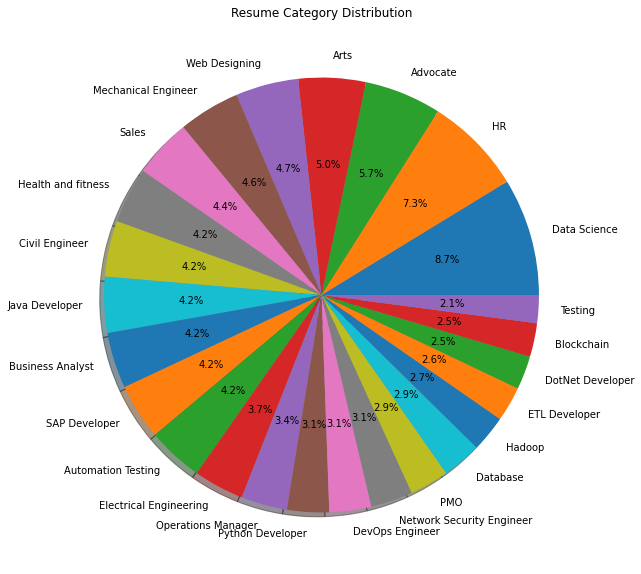

In [ ]:
# Option-2: pie plot depicting the percentage of resume distributions category-wise
plt.figure(1, figsize=(22,22))
squaregrid_layout = GridSpec(2, 2) # Grid layout to accommodate sub-plots, 2 rows x 2 columns ==> 4 sub-plots can be created
plt.subplot(squaregrid_layout[0, 1], aspect=1, title='Resume Category Distribution')
pieplot_figure = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

**Exercise 5: Convert all the `Resume` text to lower case [0.5 Mark]**




In [ ]:
option = 3
if option == 1:
    # Option-1: By creating a temporary dictionary with identical column name 'Resume'
    Deb_temp_dictionary={'Resume':[]}
    for text in df.Resume:
        lowerstr = text.lower()
        Deb_temp_dictionary['Resume'].append(lowerstr)
    d1 = pd.DataFrame(Deb_temp_dictionary)
    print("Before converting the column 'Resume' to lowercase\n") 
    print(df['Resume'].head(7))
    df['Resume'] = d1.Resume
    print("After converting the column 'Resume' to lowercase\n")
    print(df.head(7))
elif option == 2:
    # Option-2: By using list comprehension
    # Convert all characters to lowercase
    # YOUR CODE HERE
    print("Before converting the column 'Resume' to lowercase\n")
    print(df['Resume'].head(7))
    df.Resume = [text.lower() for text in df.Resume]
    print("After converting the column 'Resume' to lowercase\n")
    print(df.head(7))
elif option == 3:
    # Option-3: Applying str.lower() directly on top of the pamdas dataframe column 'Resume'
    print("Before converting the column Resume to lowercase\n") 
    print(df['Resume'].head(7))
    df['Resume']=df['Resume'].str.lower()
    print("After converting the column Resume to lowercase\n")
    print(df['Resume'].head(7))
else:
   print("Invalid option")

Before converting the column Resume to lowercase

0    skills * programming languages: python (pandas...
1    education details \r\nmay 2013 to may 2017 b.e...
2    areas of interest deep learning, control syste...
3    skills â¢ r â¢ python â¢ sap hana â¢ table...
4    education details \r\n mca   ymcaust,  faridab...
5    skills c basics, iot, python, matlab, data sci...
6    skills â¢ python â¢ tableau â¢ data visuali...
Name: Resume, dtype: object
After converting the column Resume to lowercase

0    skills * programming languages: python (pandas...
1    education details \r\nmay 2013 to may 2017 b.e...
2    areas of interest deep learning, control syste...
3    skills â¢ r â¢ python â¢ sap hana â¢ table...
4    education details \r\n mca   ymcaust,  faridab...
5    skills c basics, iot, python, matlab, data sci...
6    skills â¢ python â¢ tableau â¢ data visuali...
Name: Resume, dtype: object


### Cleaning resumes' text data

**Exercise 6: Define a function to clean the resume text [2 Mark]**

In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs: For reference click [here](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)
* RT | cc: For reference click [here](https://www.machinelearningplus.com/python/python-regex-tutorial-examples/)
* Hashtags, # and Mentions, @
* punctuations
* extra whitespace

PS: Use the provided reference similarly for removing any other such elements.

After cleaning as above, store the Resume Text in a separate column (New Feature).
 

In [ ]:
# YOUR CODE HERE
import re
import string
punct = string.punctuation
def cleanResume(resumeText):
    # removing URLs (http\S+) with extra white spaces (\s*) if any by single space character ' '
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    # removing RT and cc by single space character ' '  
    resumeText = re.sub('RT|cc', ' ', resumeText)
    # removing hashtags (#\S+) by null space  
    resumeText = re.sub('#\S+', '', resumeText)
    # removing mentions (@\S+) by double space characters  
    resumeText = re.sub('@\S+', '  ', resumeText)
    # removing punctuations ([%s]) by single space character  
    resumeText = re.sub('[%s]' % re.escape(punct), ' ', resumeText) 
    # removing ASCII characters ([^\x00-\x7f]) by single space character 
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    # removing extra whitespaces (\s+) by single space character  
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText

    # Option-2:
#def extra_space(resumeText):
#  resumeText = ' '.join(resumeText.split())
#  return resumeText

#def cleanResume(resumeText):
#  resumeText = remove_url(resumeText)
#  resumeText = remove_special_characters(resumeText)
#  resumeText = extra_

In [ ]:
 # apply the function defined above and save the 
 # YOUR CODE HERE
approach = 2
if approach == 1:
    import re
    import string
    punct_ch = string.punctuation
    def cleanResume(resumeText):
        # removing URLs (http\S+) with extra white spaces (\s*) if any by single space character ' '
        resumeText = re.sub('http\S+\s*', ' ', resumeText)
        # removing RT and cc by single space character ' '  
        resumeText = re.sub('RT|cc', ' ', resumeText)
        # removing hashtags (#\S+) by null space  
        resumeText = re.sub('#\S+', '', resumeText)
        # removing mentions (@\S+) by double space characters  
        resumeText = re.sub('@\S+', '  ', resumeText)
        # removing punctuations ([%s]) by single space character  
        resumeText = re.sub('[%s]' % re.escape(punct_ch), ' ', resumeText) 
        # removing ASCII characters ([^\x00-\x7f]) by single space character 
        resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
        # removing extra whitespaces (\s+) by single space character  
        resumeText = re.sub('\s+', ' ', resumeText)  
        return resumeText
    print("Before Cleaning the text in column 'Resume'", df['Resume'].head())    
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    print ("After Cleaning the text in column 'Resume'", df['cleaned_resume'].head())
elif approach == 2:
    import wordcloud
    import re
    import string
    def cleanResume(resumeText):
        # YOUR CODE HERE
        cleantext = ' '.join(re.sub('(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+\s+)'," ",resumeText).split()) #Hashtags, # and Mentions, @,URL,White space
        cleantext = ' '.join(re.sub('RT|cc'," ",cleantext).split()) # remove rt and cc
        cleantext=' '.join(word.strip(string.punctuation) for word in cleantext.split())# remove punctuations  
        return cleantext
    print("Before Cleaning the text in column 'Resume'", df['Resume'].head())    
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    print ("\nAfter Cleaning the text in column 'Resume'", df['cleaned_resume'].head())
else:
    print("Invalid approach")

Before Cleaning the text in column 'Resume' 0    skills * programming languages: python (pandas...
1    education details \r\nmay 2013 to may 2017 b.e...
2    areas of interest deep learning, control syste...
3    skills â¢ r â¢ python â¢ sap hana â¢ table...
4    education details \r\n mca   ymcaust,  faridab...
Name: Resume, dtype: object

After Cleaning the text in column 'Resume' 0    skills programming languages python pandas num...
1    education details may 2013 to may 2017 b e uit...
2    areas of interest deep learning control system...
3    skills r python sap hana tableau sap hana sql ...
4    education details mca ymcaust faridabad haryan...
Name: cleaned_resume, dtype: object


In [ ]:
# comparing the cleaned text column 'cleaned_resume' w.r.t the uncleaned text column 'Resume'
df.head(7)

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 b e uit...
2,Data Science,"areas of interest deep learning, control syste...",areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...


In [ ]:
sent_lens = []
for i in df.cleaned_resume:
    length = len(i.split())
    sent_lens.append(length)

print("No. of words in each resume:")
print(sent_lens,'\n')   
print("Total no. of resumes submitted:") 
print(len(sent_lens), '\n')
print("Wordcount in the highest length resume:")
print(max(sent_lens))

No. of words in each resume:
[653, 163, 267, 944, 61, 100, 213, 1137, 239, 653, 653, 163, 267, 944, 61, 100, 213, 1137, 239, 653, 653, 163, 267, 944, 61, 100, 213, 1137, 239, 653, 653, 163, 267, 944, 61, 100, 213, 1137, 239, 653, 50, 347, 21, 25, 25, 16, 17, 150, 81, 127, 100, 50, 347, 21, 25, 25, 16, 17, 150, 81, 127, 100, 50, 347, 21, 25, 25, 16, 17, 150, 81, 127, 100, 50, 347, 21, 25, 25, 16, 17, 150, 81, 127, 100, 247, 70, 20, 116, 394, 105, 74, 164, 85, 44, 247, 70, 20, 116, 394, 105, 74, 164, 85, 44, 222, 139, 1148, 58, 90, 153, 222, 139, 1148, 58, 90, 153, 222, 139, 1148, 58, 90, 153, 222, 139, 1148, 58, 90, 153, 222, 139, 1148, 58, 90, 153, 222, 139, 1148, 58, 90, 153, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 483, 481, 483, 87, 465, 1274, 234, 79, 282, 171, 1274, 234, 79, 282, 171, 1274, 234, 79, 282, 171, 1274, 234, 79, 282, 171

### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.

1. Tokenize the input words into individual tokens and store it in an array
2. Using `nltk.corpus.stopwords`, remove the stopwords 

Hint: See Module 1 - Assignment 4 'Text Classification using Naive Bayes'


**Exercise 7: Use `nltk` package to find the most common words from the `cleaned resume` column [2 Marks]**

**Hint:** 
* Use `nltk.FreqDist`


In [ ]:
# stop words
# YOUR CODE HERE to print the stop words in english language
# extracting the stopwords in english language
English_stopwords = nltk.corpus.stopwords.words('english')
print("English stopwords: ",English_stopwords)

English stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

In [ ]:
# most common words
# YOUR CODE HERE
from nltk.tokenize import word_tokenize
import string
punct_ch = string.punctuation

# removing the stopwords and punctuations
def remove_stopwords_and_punctuation(text, is_lower_case=False):
    # Step-1:
    # tokenizing the complete text from a resume and generating a list of unique words (or tokens)
    tokens_list = word_tokenize(text)
    # print("List of tokens in each resume: \n")
    # print(tokens_list)

    # Step-2:
    # Using list comprehension and The Strip() method to remove or truncate the given characters from the beginning and the end 
    # of the original string. The default behavior of the strip() method is to remove the whitespace from the beginning and at the end 
    # of the string. 
    word_tokens = [word_token.strip() for word_token in tokens_list]
    # print("List of stripped word tokens in each resume: \n")
    # print(word_tokens)

    # Step-3:
    # Filtering out the stop words and if any remaining punctuations from the list of 'word_tokens'
    filtered_tokens = [token for token in word_tokens if token not in English_stopwords and token not in punct_ch]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
# Step-4:
# Finally applying the 'remove_stopwords_and_punctuation' function on the 'cleaned_resume' column
df['cleaned_resume'] = df['cleaned_resume'].apply(remove_stopwords_and_punctuation)
df.head(7)

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 b e uit rg...
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...


In [ ]:
# If a vector = single text, then ' '.join operates on a letter by joining each letter separated by space character
# (single sentence --> word --> letter)
' '.join("skills programming languages python pandas numpy scipy scikit learn")

's k i l l s   p r o g r a m m i n g   l a n g u a g e s   p y t h o n   p a n d a s   n u m p y   s c i p y   s c i k i t   l e a r n'

In [ ]:
for resume in df.cleaned_resume[0:3]:
    print(resume)

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating review process run analy

In [ ]:
# If a pandas column vector = more than one text, then ' '.join operates on individual word by joining each word separated 
# by space character
# (multiple texts (per row one text/paragraph) --> single text --> word)
AllresumesWords_combinedText = ' '.join(words_per_resume for words_per_resume in df.cleaned_resume[0:3])
print(AllresumesWords_combinedText)

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating review process run analy

In [ ]:
# Option-1: Using nltk.probability Frequency Distribution
AllresumesWords_combinedText = ' '.join(words_per_resume for words_per_resume in df.cleaned_resume)
TotalWords = nltk.word_tokenize(AllresumesWords_combinedText)
print("Total Words: ",TotalWords)

# Evaluating frequency distribution of words across the all resumes combined text
WordsFrequencyDistribution = nltk.FreqDist(TotalWords)
print(WordsFrequencyDistribution)

# Determining the most commonly occurred top N no. of words from the all resumes combined text
N = 30
most_common_words = WordsFrequencyDistribution.most_common(N)
print("Most commonly occurred top",N,"words: \n",most_common_words)

# converting the list of tuples 'most_common_words' in a Pandas DataFrame by creating 2 columns like 'Word' & 'Count'
list_of_words = list(WordsFrequencyDistribution.items())
pd.DataFrame(list_of_words, columns = ["Word","Count"]).sort_values(by='Count',ascending=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Word,Count
86,exprience,3829
90,company,3578
531,project,3498
88,months,3288
91,description,3122
...,...,...
5883,lets,1
5882,cxmt,1
5879,discounts,1
5878,comp,1


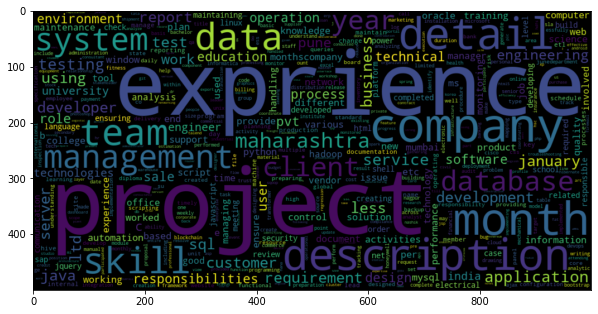

In [ ]:
# YOUR CODE HERE to show the most common word using WordCloud
# Option-2: Using WordCloud
AllresumesWords_combinedText = ' '.join(words_per_resume for words_per_resume in df.cleaned_resume)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5,collocations=False)
TotalWords = WC.generate(AllresumesWords_combinedText)
plt.figure(figsize=(10,10))
plt.imshow(TotalWords, interpolation='bilinear')
plt.axis("on")
plt.show()

**Exercise 8: Convert the categorical variable `Category` to a numerical feature and make a different column, which can be treated as the target variable [0.5 Mark]**

**Hint:** Use [`sklearn.preprocessing.LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) method

In [ ]:
df.head(7)

,Category,Resume,cleaned_resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 b e uit rg...
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...


In [ ]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Copying the dataframe 'df' to 'df_final'
df_final = df.copy()
# Creating a new column LabelEncoded_Category
df_final['LabelEncoded_Category'] = ''
df_final.head()

,Category,Resume,cleaned_resume,LabelEncoded_Category
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 b e uit rg...,
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...,
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,


In [ ]:
# YOUR CODE HERE
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

LabelEncApproach = 2
if LabelEncApproach == 1:
    source_column = ['Category']
    source_column
    # Creating Label Encoder object
    le = LabelEncoder()
    for string in source_column:
        print("Label Encoding is to be applied on source column: ",string)
    
    # Extracting all the records from the column 'Category' and storing them into a new Panadas DataFrame 'd2'
    appended_data = []
    for category in df_final.Category:
        #print(category)
        appended_data.append(category)
    d2 = pd.DataFrame(appended_data)
    
    # Doing the Label Encoding on each data in 'd2'
    labelencData = le.fit_transform(d2)
    
    # Storing the Label Encoded data into the new column 'LabelEncoded_Category'
    df_final['LabelEncoded_Category'] = labelencData
    #df_final.head(7)
elif LabelEncApproach == 2:
    # Creating Label Encoder object
    le = LabelEncoder()
    # Using .fit_transform function to fit the labelencoder and it encodes each of the string in 'Category' column 
    # and converts each string into a label encoded integer value being stored under the new column 'LabelEncoded_Category'
    df_final['LabelEncoded_Category'] = le.fit_transform(df_final['Category'])
    #df_final.head(7)
else:
    print("Invalid Label Encoding approach")
df_final.head(7)

,Category,Resume,cleaned_resume,LabelEncoded_Category
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...,6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 b e uit rg...,6
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...,6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...,6
5,Data Science,"skills c basics, iot, python, matlab, data sci...",skills c basics iot python matlab data science...,6
6,Data Science,skills â¢ python â¢ tableau â¢ data visuali...,skills python tableau data visualization r stu...,6


In [ ]:
# After label encoding, Checking the values of the LabelEncoded_Category and theor corresponding value_counts 
df_final.LabelEncoded_Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: LabelEncoded_Category, dtype: int64

In [ ]:
df_final.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

### Feature Extraction

**Exercise 9: Convert the text to feature vectors by applying `tfidf vectorizer` to the Label encoded category made above [2 Marks]**

`TF-IDF`will tokenize documents, learn the vocabulary, inverse document frequency weightings, and allow you to encode new documents

**Hint:** Use [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).



In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredFeature = df_final['cleaned_resume'].values
# print("Cleaned Text: \n")
# print(requiredFeature)
requiredTarget = df_final['LabelEncoded_Category'].values

Tfidf_word_vectorizer = TfidfVectorizer(ngram_range = (1,3)) # sublinear_tf=True, stop_words='english'
X_tfidf = Tfidf_word_vectorizer.fit_transform(requiredFeature)

print ('Tfidf_train:', X_tfidf.shape)
print ("Text converted to Tfidf Feature vectors shown below:\n")
print(X_tfidf)

Tfidf_train: (962, 84498)
Text converted to Tfidf Feature vectors shown below:

  (0, 39894)	0.02512828029782322
  (0, 50379)	0.02512828029782322
  (0, 9198)	0.024396494871307347
  (0, 17685)	0.02512828029782322
  (0, 39834)	0.02512828029782322
  (0, 71075)	0.02512828029782322
  (0, 39407)	0.02512828029782322
  (0, 35096)	0.02512828029782322
  (0, 75237)	0.02512828029782322
  (0, 77329)	0.02512828029782322
  (0, 4699)	0.02512828029782322
  (0, 3503)	0.02512828029782322
  (0, 65084)	0.02512828029782322
  (0, 31389)	0.02512828029782322
  (0, 36506)	0.02512828029782322
  (0, 4959)	0.02512828029782322
  (0, 35425)	0.02512828029782322
  (0, 73698)	0.02512828029782322
  (0, 52496)	0.02512828029782322
  (0, 38058)	0.02512828029782322
  (0, 12427)	0.02512828029782322
  (0, 79836)	0.02512828029782322
  (0, 73763)	0.02512828029782322
  (0, 27472)	0.02512828029782322
  (0, 80915)	0.020718771754918826
  :	:
  (961, 62268)	0.0372683031643662
  (961, 51975)	0.020578772396897302
  (961, 4769)	0.01901

## Naive Bayes Classifier

**Exercise 10: Split the data into train and test sets. Apply Naive Bayes Classifier (MultinomialNB) and evaluate the model predictions [1 mark]** 

**Hint:** Use Vectorized features made above as X and Labelled category as y.

In [ ]:
# YOUR CODE HERE 
X_train,X_test,y_train,y_test = train_test_split(X_tfidf, requiredTarget, random_state=0, test_size=0.2, shuffle=True, stratify=requiredTarget)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(769, 84498)
(193, 84498)
(769,)
(193,)


In [ ]:
# Creating the Multinomial Naive Bayes model object
multinomNB=MultinomialNB()
# training the model
# fitting the Multinomial NaiveBayes for tfidf vectorized features (i.e., tfidf vectorized training data)
multinomNB_tfidf = multinomNB.fit(X_train, y_train)
print ('MultinomialNB for tf-idf :',multinomNB_tfidf)

MultinomialNB for tf-idf : MultinomialNB()


In [ ]:
multinomNB_tfidf_predict = multinomNB_tfidf.predict(X_test)
# Accuracy test of the Multinomial Naive Bayes Model
accuracy_from_training_set = multinomNB_tfidf.score(X_train, y_train)
accuracy_from_test_set = multinomNB_tfidf.score(X_test, y_test)
print('MultinomialNB Classifier: Accuracy achieved out of training set: {:.2f}'.format(accuracy_from_training_set))
print('MultinomialNB Classifier: Accuracy achieved out of test set: {:.2f}'.format(accuracy_from_test_set))

# Classification report for the Multinomial Naive Bayes Model
report = metrics.classification_report(y_test, multinomNB_tfidf_predict)
print ("\n Classification report for classifier %s:\n%s\n" % (multinomNB_tfidf, report))

MultinomialNB Classifier: Accuracy achieved out of training set: 0.99
MultinomialNB Classifier: Accuracy achieved out of test set: 0.95

 Classification report for classifier MultinomialNB():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      0.50      0.67         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        

In [ ]:
print("\n Confusion Matrix for classifier %s:\n%s\n" % (multinomNB_tfidf, metrics.confusion_matrix(y_test, multinomNB_tfidf_predict)))


 Confusion Matrix for classifier MultinomialNB():
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  1
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  3  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  

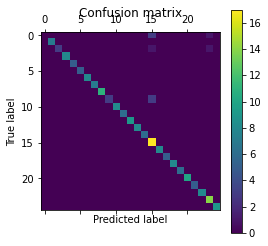

In [ ]:
# confusion matrix plot using matplotlib.pyplot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

mnb_predict= metrics.confusion_matrix(y_test, multinomNB_tfidf_predict)
plt.matshow(mnb_predict)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# predicting the model for tfidf features
print("predictions for tf-idf :", multinomNB_tfidf_predict)

predictions for tf-idf : [14  4 23 18 12 20 11 10 22 19 23 24  3 18 23 20 10  3 16 12  8  3 20 23
 13 20 15 14 23 21  5 18 17 15 17 16 11 15  1  6 18 18 14 20  6 15  5  3
  8 14 14 20  5 21 10  4 12 15 23  3 14 13  1  7 16  4  8  6 11 19  8 24
 21  6 23 22 15 22 15 23 19 10 24  8 11  4  1 24  1 10 18  7 24  6  9 19
 21 23  5  3 17 19 15 23  2  8 22 15 12 13 15 15 23 12 24 10 23 13  7 16
 15  7 15 15 15 13 21  2  5 24 15 16  8 20 15  7 13  8  4 12  3 12 15  8
  7 16  1 22 23 12  8 22 10 18 17  9 20 15 20 10 24 19 12 20 15  1  6  2
 15  9  3 17 13 22  8 23 11 16 23  1 15  6  6 13 24 11  7 23 16 22 15 18
 15]


In [ ]:
# accuracy score for tf- vectorized feature
mnb_tfidf_score = accuracy_score(y_test, multinomNB_tfidf_predict)
print("mnb_tfidf_score :", mnb_tfidf_score)

mnb_tfidf_score : 0.9533678756476683


## Optional: Create a Gradio based web interface to test and display the model predictions

**Report Analysis**
- Which method(s), other than TF-IDF could be used for text to vector conversion? 
- Discuss about the `alpha`, `class_prior` and `fit_prior` parameters in sklearn `MultinomialNB`


Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download) 

In [ ]:
!pip -qq install gradio

In [ ]:
import gradio
def preprocess_text(text):
    text = cleanResume(text)
    text = remove_stopwords_and_punctuation(text)
    text = text.lower()
    return text

In [ ]:
#text="Applying for the role of data scientist and have good analytics and statistic skills and have 3 years of experience and good in data [visualizing]"
def predict_resume(text):
  processed_text = preprocess_text(text)
  review = Tfidf_word_vectorizer.transform([processed_text])
  pred = multinomNB_tfidf.predict(review)
  outputCategory = df_final.Category[df_final['LabelEncoded_Category']==pred[0]].unique()
  return outputCategory

In [ ]:
# Predicting the unknown resume 
predict_resume("Debasish Bhaskar, Education: B.Tech (ECE), M.Tech (ECE), 5G NR and 6G AI/ML Air-Native Interface * Programming Skills * Programming Languages: Python (numpy, pandas, scipy, scikit-learn, matplotlib), Database (Sql), Java, JavaScript/JQuery. * Machine Learning: Regression, SVM, NaÃƒÂ¯ve Bayes, KNN, Random Forest, Decision Trees,")

array(['Data Science'], dtype=object)

In [ ]:
# Creating the GUI for giving resume text input
#Resume text input
in_resume = gradio.inputs.Textbox(lines=2, placeholder=None, default="resume", label='Enter Resume Text')

In [ ]:
# Predicting the unknown resume's category and Displaying the prediction result as output
out_label = gradio.outputs.Textbox(type='text', label='Predicted Resume Label')

In [ ]:
# Gradio interface creation and generating the UI link

iface = gradio.Interface(fn = predict_resume, inputs = [in_resume], outputs = [out_label])
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://b1fbecd3037d8e9b.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
